# This is just a small code to check the Keithley connection.

In [1]:
import pyvisa
import numpy as np
import matplotlib.pyplot as plt
import time
rm = pyvisa.ResourceManager()
rm.list_resources()


event_type=pyvisa.constants.EventType.service_request
event_mech=pyvisa.constants.EventMechanism.queue
# FROM THE INSTRUMENT WEB-INTERFACE THE NAME IS
# TCPIP::169.254.207.124::inst0::INSTR

In [2]:
inst = rm.open_resource('TCPIP::169.254.207.124::inst0::INSTR')
'''# Type of event we want to be notified about
event_type = pyvisa.constants.EventType.service_request
# Mechanism by which we want to be notified
event_mech = pyvisa.constants.EventMechanism.queue
inst.enable_event(event_type, event_mech)
'''

'# Type of event we want to be notified about\nevent_type = pyvisa.constants.EventType.service_request\n# Mechanism by which we want to be notified\nevent_mech = pyvisa.constants.EventMechanism.queue\ninst.enable_event(event_type, event_mech)\n'

In [3]:
'''
with rm.open_resource("TCPIP::169.254.207.124::inst0::INSTR") as inst:
    # Type of event we want to be notified about
    event_type = constants.EventType.service_request
    # Mechanism by which we want to be notified
    event_mech = constants.EventMechanism.queue
    inst.enable_event(event_type, event_mech)
    # Instrument specific code to enable service request
    # (for example on operation complete OPC)
    inst.write("*SRE 1")
    inst.write("INIT")
    # Wait for the event to occur
    response = inst.wait_on_event(event_type, 1000)
    inst.assert_response.event.event_type == event_type
    inst.assert_response.timed_out = False
    inst.disable_event(event_type, event_mech)
'''

'\nwith rm.open_resource("TCPIP::169.254.207.124::inst0::INSTR") as inst:\n    # Type of event we want to be notified about\n    event_type = constants.EventType.service_request\n    # Mechanism by which we want to be notified\n    event_mech = constants.EventMechanism.queue\n    inst.enable_event(event_type, event_mech)\n    # Instrument specific code to enable service request\n    # (for example on operation complete OPC)\n    inst.write("*SRE 1")\n    inst.write("INIT")\n    # Wait for the event to occur\n    response = inst.wait_on_event(event_type, 1000)\n    inst.assert_response.event.event_type == event_type\n    inst.assert_response.timed_out = False\n    inst.disable_event(event_type, event_mech)\n'

In [4]:
# Just to check that everything is ok..
print('Resource name  :', inst.resource_name)
print('Resource info  :',inst.resource_info)
print('Resource class :',inst.resource_class)
print('Resource manuf.:',inst.resource_manufacturer_name)

Resource name  : TCPIP0::169.254.207.124::inst0::INSTR
Resource info  : ResourceInfo(interface_type=<InterfaceType.tcpip: 6>, interface_board_number=0, resource_class='INSTR', resource_name='TCPIP0::169.254.207.124::inst0::INSTR', alias=None)
Resource class : INSTR
Resource manuf.: National Instruments


In [5]:
print(inst.query('*IDN?'))

KEITHLEY INSTRUMENTS,MODEL 2450,04451367,1.6.7c



In [6]:
# Make a measurement 0-1V, measure IV
inst.write('*RST')                   #Reset
inst.write('SENS:FUNC "CURR"')       # Set current
inst.write('SENS:CURR:RANG:AUTO ON') # Set current range
inst.write('SENS:CURR:RSEN OFF')     # Set 2wires (4wires off)
inst.write('SOUR:FUNC VOLT')         # Set voltage
inst.write('SOUR:VOLT:RANG:AUTO ON') # Set voltage range:auto
inst.write('SOUR:VOLT:ILIM 1')       # Set current compliace
inst.write('SOUR:SWE:VOLT:LIN -2.5, 2.5, 51, 0.01')
inst.write(':INIT')                  # Start!
'''
# Wait for the event to occur
response = inst.wait_on_event(event_type, 1000)
inst.assert_response.event.event_type == event_type
inst.assert_response.timed_out = False
inst.disable_event(event_type, event_mech)
'''

'''
inst.assert_trigger()
time.sleep(0.1)
inst.wait_on_event(event_type, 1000)
#inst.wait_on_event(event_type)#non sembra funzionare...
#inst.write('*WAI')#non sembra funzionare...
'''
time.sleep(30)#ci mettiamo una brutta pezza per ora.
print('Fatto')

Fatto


Before executing the cell below, wait for the previous code to be executed.
For now, best way to check the code execution is to connect to the web-interface of the instrument and look at it. Last time it was in 169.254.207.124. We can eventually set a fixed IP for it I think.

In [7]:
# Leggo 10 dati, per vedere se è andato...
#print(inst.query('TRAC:DATA? 1, 10, "defbuffer1", SOUR, READ'))

In [8]:
x=np.array(inst.query_ascii_values('TRAC:DATA? 1, 51, "defbuffer1", SOUR'))
y=np.array(inst.query_ascii_values('TRAC:DATA? 1, 51, "defbuffer1", READ'))

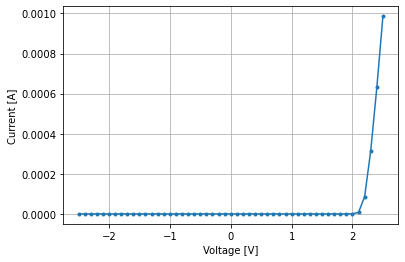

In [9]:
hf_IVcurve=plt.plot(x, y, '.-')
plt.xlabel('Voltage [V]')
plt.ylabel('Current [A]')
plt.grid(visible='true')


In [10]:
pyvisa.__version__

'1.11.3'